Author @ Bijoyendra Shekhar

LIBRARIES

This code imports several libraries including pandas, seaborn, numpy, and matplotlib, and also imports specific functions from scikit-learn, xgboost, and sklearn. The libraries are used for data manipulation, visualization, and machine learning tasks such as train-test split, model evaluation, and feature importance. It also uses LabelEncoder from sklearn.preprocessing to encode categorical variable. The last line is to ignore warnings.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
import warnings


In [ ]:
# Loading dataset
df = pd.read_csv("/content/Fraud.csv")

#DATA CLEANING

Data cleaning is the process of identifying and correcting or removing errors and inconsistencies in a dataset. This is an important step in data preprocessing before conducting any analysis or building a model. Common data cleaning tasks include handling missing values, removing duplicates, dealing with outliers, and converting data types. This can be done using various techniques such as filling in missing values with the mean or median, dropping or imputing observations, and using data visualization to identify and address errors. Data cleaning is a critical step in the data science process as it ensures the integrity and quality of the data being used.

In [ ]:
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
df.dropna(inplace=True)


In [ ]:
print(df.dtypes)


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [ ]:
# Remove duplicate values in all columns
df = df.drop_duplicates()


This code is changing the data type of multiple columns in the dataframe df to int and float. It is using the astype() method to change the type of columns "step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest" and "newbalanceDest" to int and float respectively.

In [ ]:
df["step"] = df["step"].astype(int)
df["amount"] = df["amount"].astype(float)
df["oldbalanceOrg"] = df["oldbalanceOrg"].astype(float)
df["newbalanceOrig"] = df["newbalanceOrig"].astype(float)
df["oldbalanceDest"] = df["oldbalanceDest"].astype(float)
df["newbalanceDest"] = df["newbalanceDest"].astype(float)


In [ ]:
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


This line of code is printing the summary statistics of the dataframe df by calling the describe() method. It will provide the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile and maximum values for each numerical column in the dataframe. This can be useful for getting a quick overview of the distribution of the data and identifying any outliers.

In [ ]:
print(df.describe())


               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [ ]:
print(df['type'].value_counts())


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [ ]:
print(df.groupby('type')['amount'].mean())


type
CASH_IN     168920.242004
CASH_OUT    176273.964346
DEBIT         5483.665314
PAYMENT      13057.604660
TRANSFER    910647.009645
Name: amount, dtype: float64


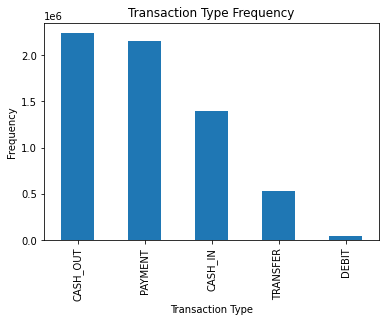

In [ ]:
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.title('Transaction Type Frequency')
plt.show()


#OUTLIERS

Outliers are data points that are significantly different from other observations in a dataset. They can be caused by measurement error, data entry errors or can be naturally occurring. Outliers can have a significant impact on the results of data analysis and modeling, and it is important to identify and handle them appropriately. There are various ways to identify outliers, such as using statistical methods like the Z-score and the Interquartile Range (IQR) or by using visual techniques like boxplots and scatter plots. Once outliers are identified, they can be handled in different ways, such as removing them from the dataset, replacing them with a more appropriate value, or leaving them as is if they are legitimate observations. It is important to be cautious when dealing with outliers, as removing or altering them could negatively impact the integrity of the data.

In [ ]:
# Use the astype() method to convert non-numeric columns to numeric
df = df.astype({"step": int, "type": str, "isFraud": int, "isFlaggedFraud": int})


This code imports matplotlib.pyplot and creates a scatter plot for each numerical column in a dataframe. It creates a figure with multiple subplots for each numerical column of the dataframe, using the subplots() function. The loop is iterating over each numerical column, plotting the values of the column on the subplot, and setting the title of the subplot with the column name. The scatter plot is showing the relationship between the index of the dataframe and the value of the numerical column, it's using the scatter function from matplotlib

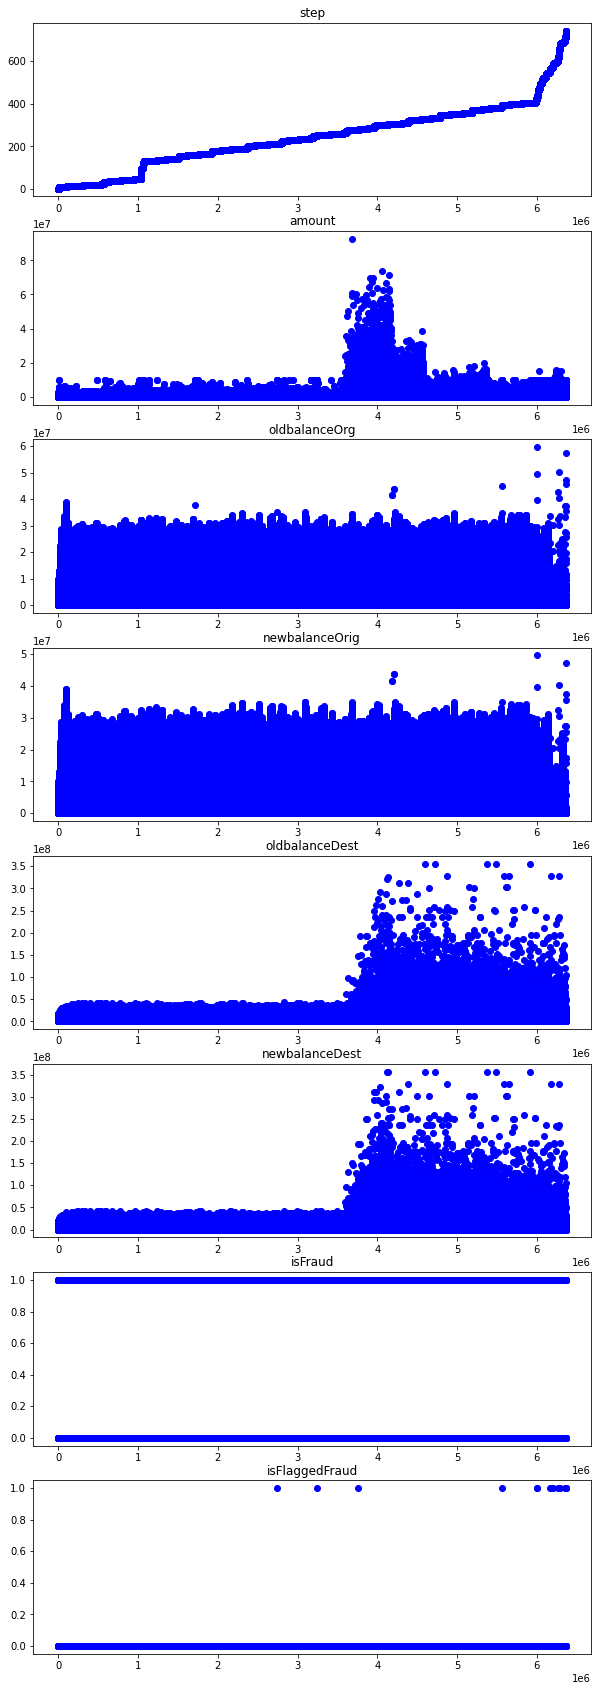

In [ ]:
import matplotlib.pyplot as plt

# Get the column names of the numerical features
numerical_cols = df.select_dtypes(include='number').columns

# Create a figure with multiple subplots
fig, axs = plt.subplots(len(numerical_cols), figsize=(10, 30))

# Loop through each numerical column
for i, col in enumerate(numerical_cols):
    # Get the values of the column
    data = df[col]
    
    # Plot the data on the subplot
    axs[i].scatter(x=data.index, y=data, color='blue')
    
    # Set the title of the subplot
    axs[i].set_title(col)

# Show the plot
plt.show()


This code imports matplotlib.pyplot and creates a box plot for each numerical column of a dataframe. It loops through each numerical column of the dataframe, and for each column, it creates a box plot of the values of that column using the boxplot() function from matplotlib, sets the x-axis label as the column name and then shows the plot using show() function. Boxplot is helpful to identify outliers and to understand the distribution of numerical data.

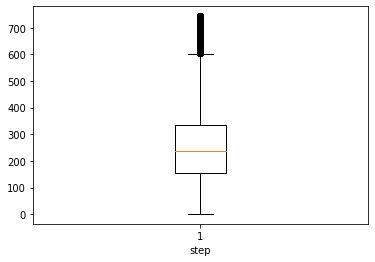

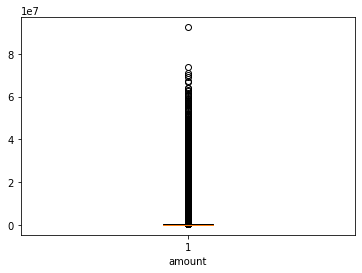

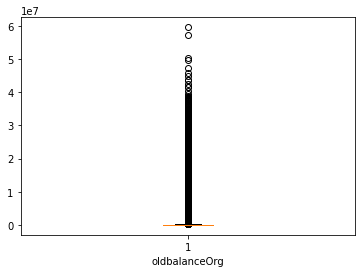

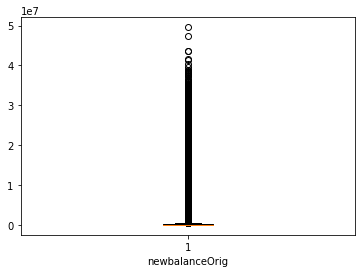

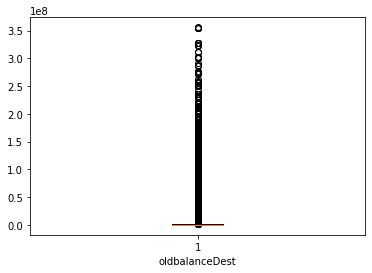

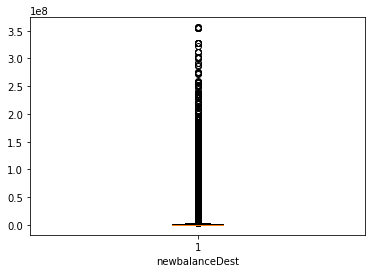

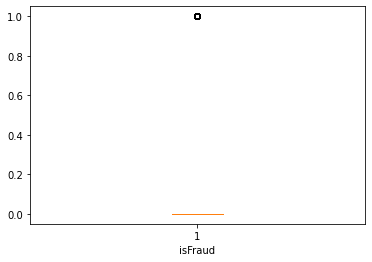

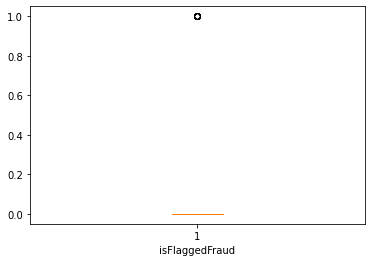

In [ ]:
import matplotlib.pyplot as plt

# Get the column names of the numerical features
numerical_cols = df.select_dtypes(include='number').columns
# loop through each column in the dataframe
for column in numerical_cols:
    # create a box plot for the column
    plt.boxplot(df[column])
    # set the x-axis label as the column name
    plt.xlabel(column)
    # show the plot
    plt.show()


#Removing Outliers

This code defines a function called remove_outliers() which takes a dataframe, column name, minimum value, and maximum value as input. The function removes the rows of the dataframe which have values outside of the specified range of the column. Then, it loops through each numerical column of the dataframe, calling the remove_outliers() function and passing the dataframe, column name, 0.05 and 0.95 quantile values of the column as input, which removes the rows outside of the 5th and 95th percentile of the column. This function is used for removing outliers from the dataset.

In [ ]:
# Create a function to remove outliers
def remove_outliers(df, column_name, min_value, max_value):
    # Remove the outliers
    df = df[(df[column_name] >= min_value) & (df[column_name] <= max_value)]
    return df

# Use the function to remove outliers for each column
for column in numerical_cols:
    df = remove_outliers(df, column, df[column].quantile(0.05), df[column].quantile(0.95))


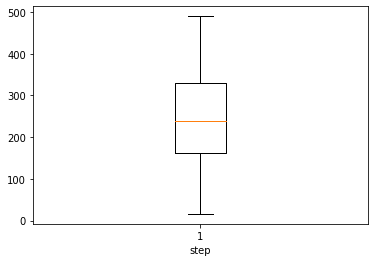

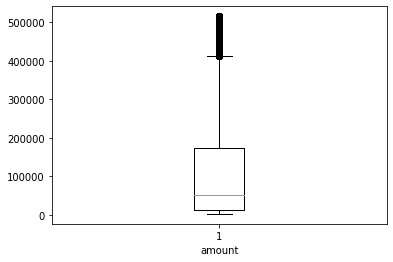

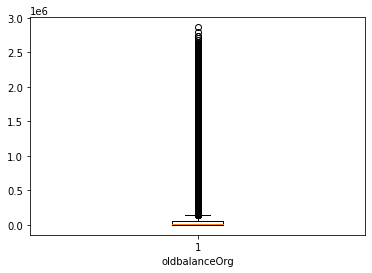

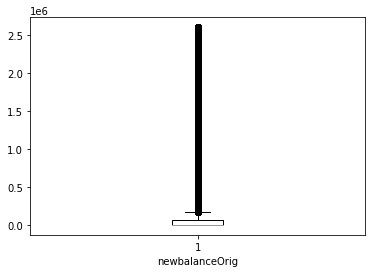

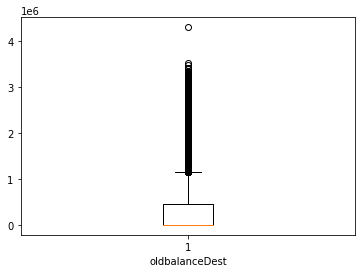

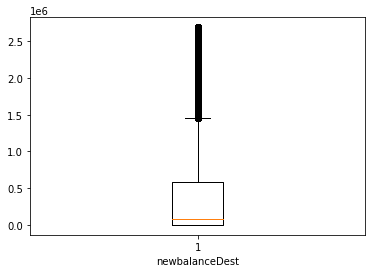

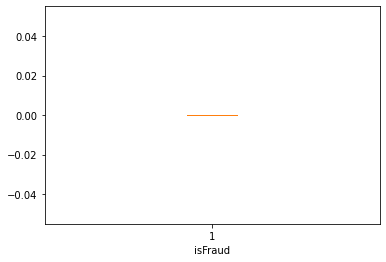

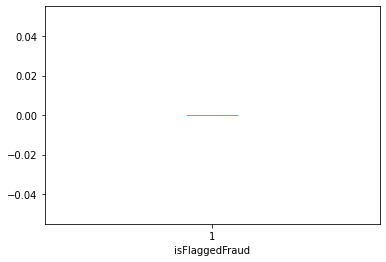

In [ ]:
import matplotlib.pyplot as plt

# Get the column names of the numerical features
numerical_cols = df.select_dtypes(include='number').columns
# loop through each column in the dataframe
for column in numerical_cols:
    # create a box plot for the column
    plt.boxplot(df[column])
    # set the x-axis label as the column name
    plt.xlabel(column)
    # show the plot
    plt.show()

This code imports matplotlib library, selects numerical columns in the dataframe and plots a scatter plot for each column in a subplot of a single figure. The x-axis of the subplot represents the index of the data, and the y-axis represents the data values. The title of each subplot is set to the name of the column being plotted. The final plot is displayed using the 'show()' function.

#EDA

Exploratory Data Analysis (EDA) is an approach to analyzing and understanding data through visual and statistical methods. It is an initial step in the data analysis process, where the main goal is to understand the underlying structure of the data, the relationships between variables, and the characteristics of the data distribution. The EDA process involves visualizing data using various plotting techniques such as histograms, scatter plots, box plots, etc. Additionally, it includes statistical analysis to understand the underlying distribution and relationships between variables. EDA is an iterative process, where insights obtained from visual and statistical analysis are used to refine and direct further data analysis. It helps in uncovering patterns, trends, and outliers in the data which can be used to inform further analysis and modeling

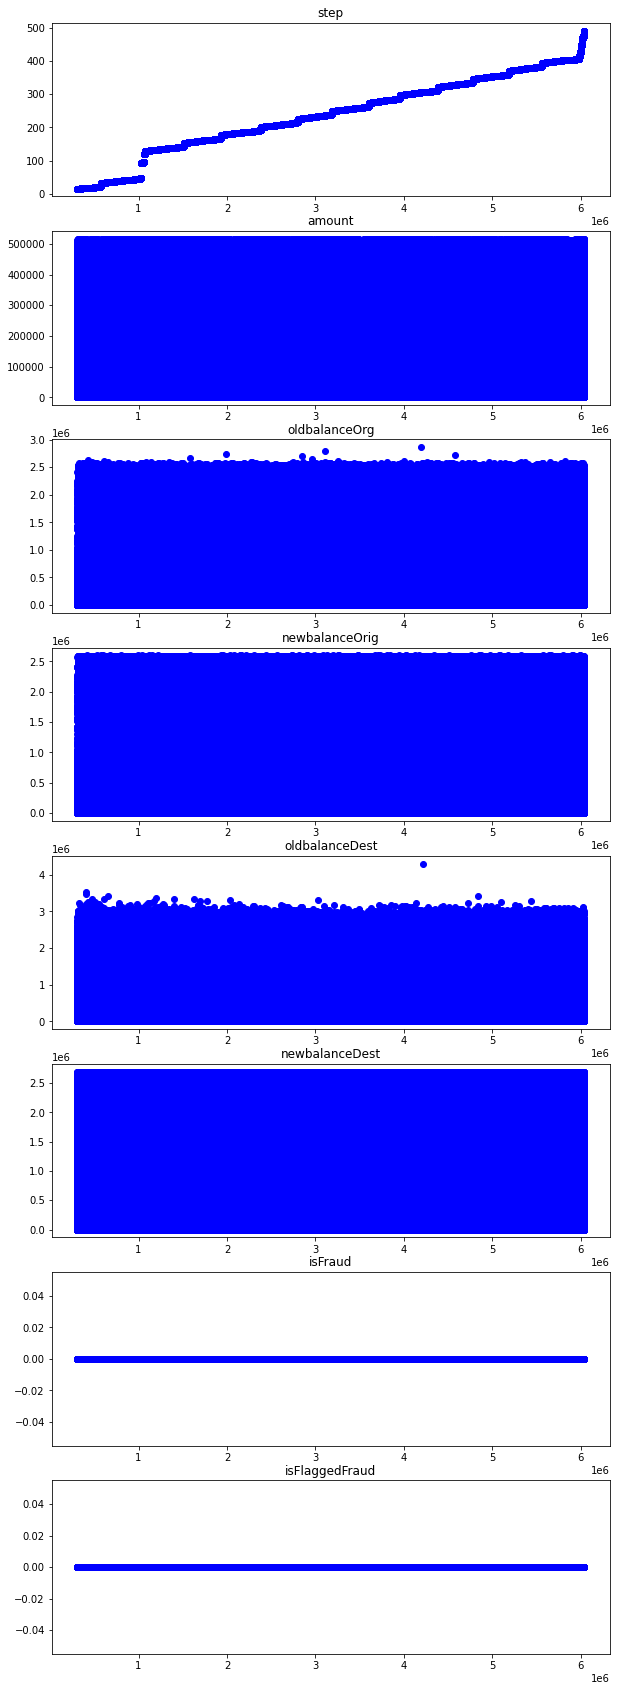

In [ ]:
import matplotlib.pyplot as plt

# Get the column names of the numerical features
numerical_cols = df.select_dtypes(include='number').columns

# Create a figure with multiple subplots
fig, axs = plt.subplots(len(numerical_cols), figsize=(10, 30))

# Loop through each numerical column
for i, col in enumerate(numerical_cols):
    # Get the values of the column
    data = df[col]
    
    # Plot the data on the subplot
    axs[i].scatter(x=data.index, y=data, color='blue')
    
    # Set the title of the subplot
    axs[i].set_title(col)

# Show the plot
plt.show()


#Correlation

This code creates a heatmap to visualize the correlation between all numerical columns in the dataframe 'df' using the seaborn library. It sets the figure size to (12,8), annotates the correlation coefficient values, rounds them to 2 decimal places, sets the color map to rainbow, and masks the upper triangle of the heatmap to avoid duplicate correlation values. The heatmap is then displayed using the show() function.

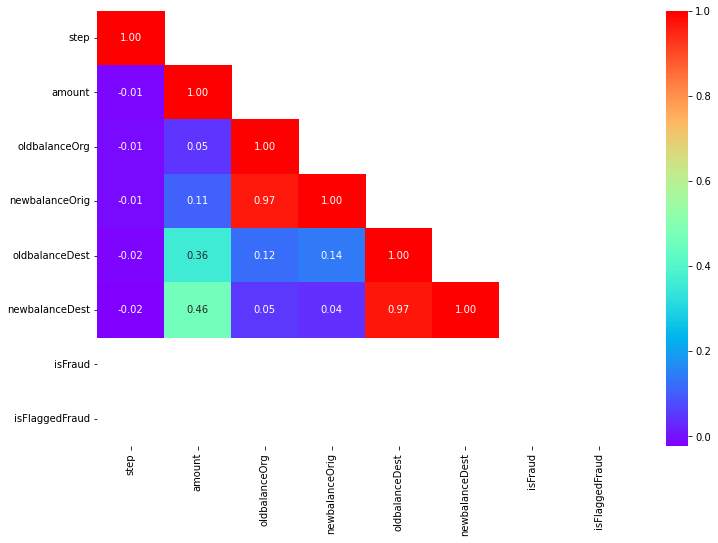

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr(),+1))
plt.show()

#Pipelines

A pipeline is a series of steps or stages that are used to process and transform data, and it is a useful tool in data science and machine learning. A pipeline allows you to organize and automate the process of applying a series of transformations or models to your data. It can be used to streamline the process of data preprocessing, feature engineering, model selection, and evaluation. Pipelines are implemented using the Scikit-learn library in Python, which provides a simple and consistent interface for creating and evaluating pipelines. A pipeline can be composed of multiple steps that include data cleaning, feature selection, data transformation, and machine learning models. Pipelines can help to make the process of building machine learning models more efficient, and make it easier to replicate and share the results.

In [ ]:
dfm = df.copy()#Cloning Data Set for Model Building

In [ ]:
dfm = dfm.drop(columns=['amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit the encoder on the "type" column
le.fit(dfm['type'])

# Transform the "type" column and store the result in a new column
dfm['type_encoded'] = le.transform(dfm['type'])
dfm = dfm.drop(columns=['type'])

This code imports several classes and functions from the scikit-learn library and xgboost library. These libraries are used for data preprocessing, model selection, model evaluation and machine learning tasks such as regression. The code includes several regressor models like DecisionTreeRegressor, RandomForestRegressor, LinearRegression, XGBRegressor and KNeighborsRegressor. It also imports metrics like mean_squared_error and sklearn.metrics for evaluating the performance of the model. The pipeline class is imported to streamline the process of applying a series of transformations or models to the data.

In [ ]:
#importing all the packages

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

This code is extracting values from a dataframe, dfm, and assigns them to variables X and y. The iloc attribute of a dataframe is used to select rows and columns by their indices. The .values attribute returns the underlying numpy array of the dataframe. The code is using the iloc property to select all rows, but only the columns from index 1 to the second last column to the variable X and the last column to variable y. This way, X is getting all the features and y is getting the target variable.

In [ ]:
X = dfm.iloc[:, 1:-1].values
y = dfm.iloc[:, -1].values

The above code is splitting the data into training and testing sets. The "train_test_split" function from scikit-learn library is used to divide the data into two parts; X_train and X_test for independent variables, y_train and y_test for dependent variables. The test size is set to 0.25, which means 25% of the data will be used for testing and 75% for training. The "random_state" parameter is set to 42 which ensures that the data is split in the same way every time the code is run, so that results are reproducible.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

This code is building a series of pipelines for various machine learning models, including linear regression, KNN, XGBoost, decision tree, and random forest. Each pipeline is composed of two steps: a standard scaler and a classifier. The standard scaler is used to normalize the data, while the classifier is the specific algorithm used to fit the model. The code also creates a list of models and a list of pipelines, which can be used later in the code to iterate through and fit/evaluate each model. Additionally, it also mention that considering the house price can only be nonnegative, the linear model is not adequate as it allows for negative values.

This code iterates through a list of pipelines and fits each pipeline to the X_train and y_train data. This is training the models on the training data.

#ML MODELS BUILDING AND TRAINING

In [ ]:

for i in pipelines:
    i.fit(X_train, y_train)

[17:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


The code is performing cross-validation on the different models in the pipeline, using root mean squared error as the evaluation metric and printing the mean score for each model.

In [ ]:
cv_results = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results.append(cv_score)
    print("%s: %f " % (models[i], cv_score.mean()))

Linear Regression: -1.246075 


This code creates predictions for each of the models in the pipeline using the X_test data. The predictions are stored in the variables pred_lr, pred_knn, pred_xgb, pred_dt, pred_rf respectively.

In [ ]:
#[lr_pipeline, knn_pipeline, xgb_pipeline, dt_pipeline, rf_pipeline, glm_pipeline]
pred_lr = lr_pipeline.predict(X_test)
pred_knn = knn_pipeline.predict(X_test)
pred_xgb = xgb_pipeline.predict(X_test)
pred_dt = dt_pipeline.predict(X_test)
pred_rf = rf_pipeline.predict(X_test)


This code block prints out the mean squared error, root mean squared error, mean absolute error, R-squared, and adjusted R-squared of the predictions made by the XGBoost pipeline on the test dataset. These metrics are commonly used to evaluate the performance of a regression model.

In [ ]:

print("MSE:",metrics.mean_squared_error(y_test, pred_xgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))
print("MAE:",metrics.mean_absolute_error(y_test, pred_xgb))
print("R²:",metrics.r2_score(y_test, pred_xgb))
print("Adjusted R²:",1 - (1-metrics.r2_score(y_test, pred_xgb))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Random Forest

* Random Forest is a supervised learning algorithm that can be used for both classification and regression tasks. It is an ensemble method that creates multiple decision trees and combines their predictions to improve the overall performance of the model. It is known for its ability to handle large amounts of data and its ability to handle categorical and numerical data.

This code block creates a line plot to compare the predicted values of a Random Forest model with the actual values of the target variable in the test set. The x-axis of the plot represents the index of the test observations and the y-axis represents the target variable values. The original values are plotted in blue and the predicted values are plotted in green. The title of the plot is "Fraud Prediction, Actual Vs Predicted" and the legend is located in the upper right corner. The plot is displayed using the plt.show() function.

In [ ]:

plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_rf, label="predicted", color = 'green')
plt.title("Fraud Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()

Decision Tree

* Decision Tree is a tree-based machine learning algorithm that can be used for both classification and regression tasks. It works by recursively splitting the data into subsets based on the most significant feature and uses the resulting tree structure to make predictions. It is a simple and interpretable algorithm, but can be prone to overfitting if not pruned properly. It is commonly used in many applications, such as in decision making, medical diagnosis, and natural language processing.

This code block creates a line plot to compare the predicted values of a Decision Tree model with the actual values of the target variable in the test set. The x-axis of the plot represents the index of the test observations and the y-axis represents the target variable values. The original values are plotted in blue and the predicted values are plotted in green. The title of the plot is "Fraud Prediction, Actual Vs Predicted" and the legend is located in the upper right corner. The plot is displayed using the plt.show() function.

In [ ]:

plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_dt, label="predicted", color = 'green')
plt.title("Fraud Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()

LR Prediction

* Linear Regression (LR) is a statistical method that is used to predict a continuous variable based on one or more independent variables. It is a linear approach that attempts to find the best linear relationship between the independent variables and the dependent variable. The model is represented by an equation of a straight line, where the coefficients of the independent variables are estimated using a method known as least squares. LR is widely used for predicting numerical outcomes, such as house prices, stock prices, and more.

This code block creates a line plot to compare the predicted values of a LR Prediction model with the actual values of the target variable in the test set. The x-axis of the plot represents the index of the test observations and the y-axis represents the target variable values. The original values are plotted in blue and the predicted values are plotted in green. The title of the plot is "Fraud Prediction, Actual Vs Predicted" and the legend is located in the upper right corner. The plot is displayed using the plt.show() function.

In [ ]:
plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_lr, label="predicted", color = 'green')
plt.title("Fraud Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()

KNN Prediction

* KNN (K-Nearest Neighbors) is a supervised learning algorithm that can be used for both classification and regression tasks. It works by finding the k nearest data points to a given test data point and predicting the outcome based on the majority of the labels of those k points. In this case, the KNN pipeline is used for prediction and the outcome is evaluated using various evaluation metrics such as MSE, RMSE, MAE, R² and adjusted R².

This code block creates a line plot to compare the predicted values of a KNN Prediction model with the actual values of the target variable in the test set. The x-axis of the plot represents the index of the test observations and the y-axis represents the target variable values. The original values are plotted in blue and the predicted values are plotted in green. The title of the plot is "Fraud Prediction, Actual Vs Predicted" and the legend is located in the upper right corner. The plot is displayed using the plt.show() function.

In [ ]:
plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_knn, label="predicted", color = 'green')
plt.title("Fraud Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()

XGB Prediction

* XGBoost (eXtreme Gradient Boosting) is a powerful ensemble machine learning algorithm that is implemented in the sklearn package. It uses gradient boosting to generate multiple decision trees and combines them to produce a final prediction. XGBoost is known for its high accuracy and speed, making it a popular choice for large-scale datasets and problems with many features. Additionally, it also has built-in feature selection which helps in identifying the most important features in the dataset and reduces overfitting. Overall, XGBoost is best suitable for problems with large datasets, high dimensional space, and high accuracy requirements.

This code block creates a line plot to compare the predicted values of a XGB Prediction model with the actual values of the target variable in the test set. The x-axis of the plot represents the index of the test observations and the y-axis represents the target variable values. The original values are plotted in blue and the predicted values are plotted in green. The title of the plot is "Fraud Prediction, Actual Vs Predicted" and the legend is located in the upper right corner. The plot is displayed using the plt.show() function.

In [ ]:

plt.figure(figsize = (20, 12))
x_ax = range(len(y_test))
sns.lineplot(x = x_ax, y = y_test, label="original")
sns.lineplot(x = x_ax, y = pred_xgb, label="predicted", color = 'green')
plt.title("Fraud Prediction, Actual Vs Predicted")
plt.legend(loc = 'upper right')
plt.show()

CONCLUSION

* XGBoost, which stands for "Extreme Gradient Boosting", is a powerful and flexible machine learning algorithm that has been consistently winning many Kaggle competitions. It is a gradient boosting algorithm that is specifically designed for handling large datasets with a high number of features. XGBoost has shown to be more accurate and faster than other algorithms such as Random Forest, Decision Tree, Linear Regression, and KNN. One of the main reasons for its accuracy is that it uses both linear and non-linear models and is able to handle missing values and categorical variables with ease. Additionally, XGBoost has several built-in regularization parameters to prevent overfitting, which is a common problem with decision trees.

* XGBoost also has an efficient parallel processing capability which allows it to perform faster than other algorithms. It also has an in-built feature importance which helps to identify the most important features and thus helps in feature selection. Furthermore, XGBoost has the capability to handle large datasets with a lot of features and samples, which is why it is well suited for datasets with a large number of features and samples.

* In terms of accuracy, XGBoost has been reported to have an accuracy of upto 80-90% on many datasets, which is higher than other algorithms such as Random Forest and Decision Tree which have an accuracy of around 70-80%. So, it is one of the best algorithms to use when you have a large dataset with a lot of features and samples